<a href="https://colab.research.google.com/github/anshuman-gaikwad/TechSonIx-FEB25-Gaikwad-DataScience/blob/main/INTERNSHIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving SVMtrain.csv to SVMtrain (1).csv
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
       PassengerId    Survived      Pclass         Sex           Age  \
count   889.000000  889.000000  889.000000  889.000000  8.890000e+02   
mean    446.000000    0.382452    2.311586    0.649044 -6.793716e-17   
std     256.998173    0.486260    0.834700    0.477538  1.000563e+00   
min       1.000000    0.000000    1.000000    0.000000 -1.987202e+00   
25%     224.000000    0.000000    2.000000    0.000000 -7.712038e-01   
50%     446.000000    0.000000    3.000000    1.000000 -2.077201e-01   
75%     668.000000    1.000000    3.000000    1.000000  1.031944e+00   
max     891.000000    1.000000    3.000000    1.000000  2.497002e+00   

            SibSp       Parch          Fare    Embarked  
count  889.000000  889.000000  8.890000e+02  889.000000  
mean     0.524184    0.382452

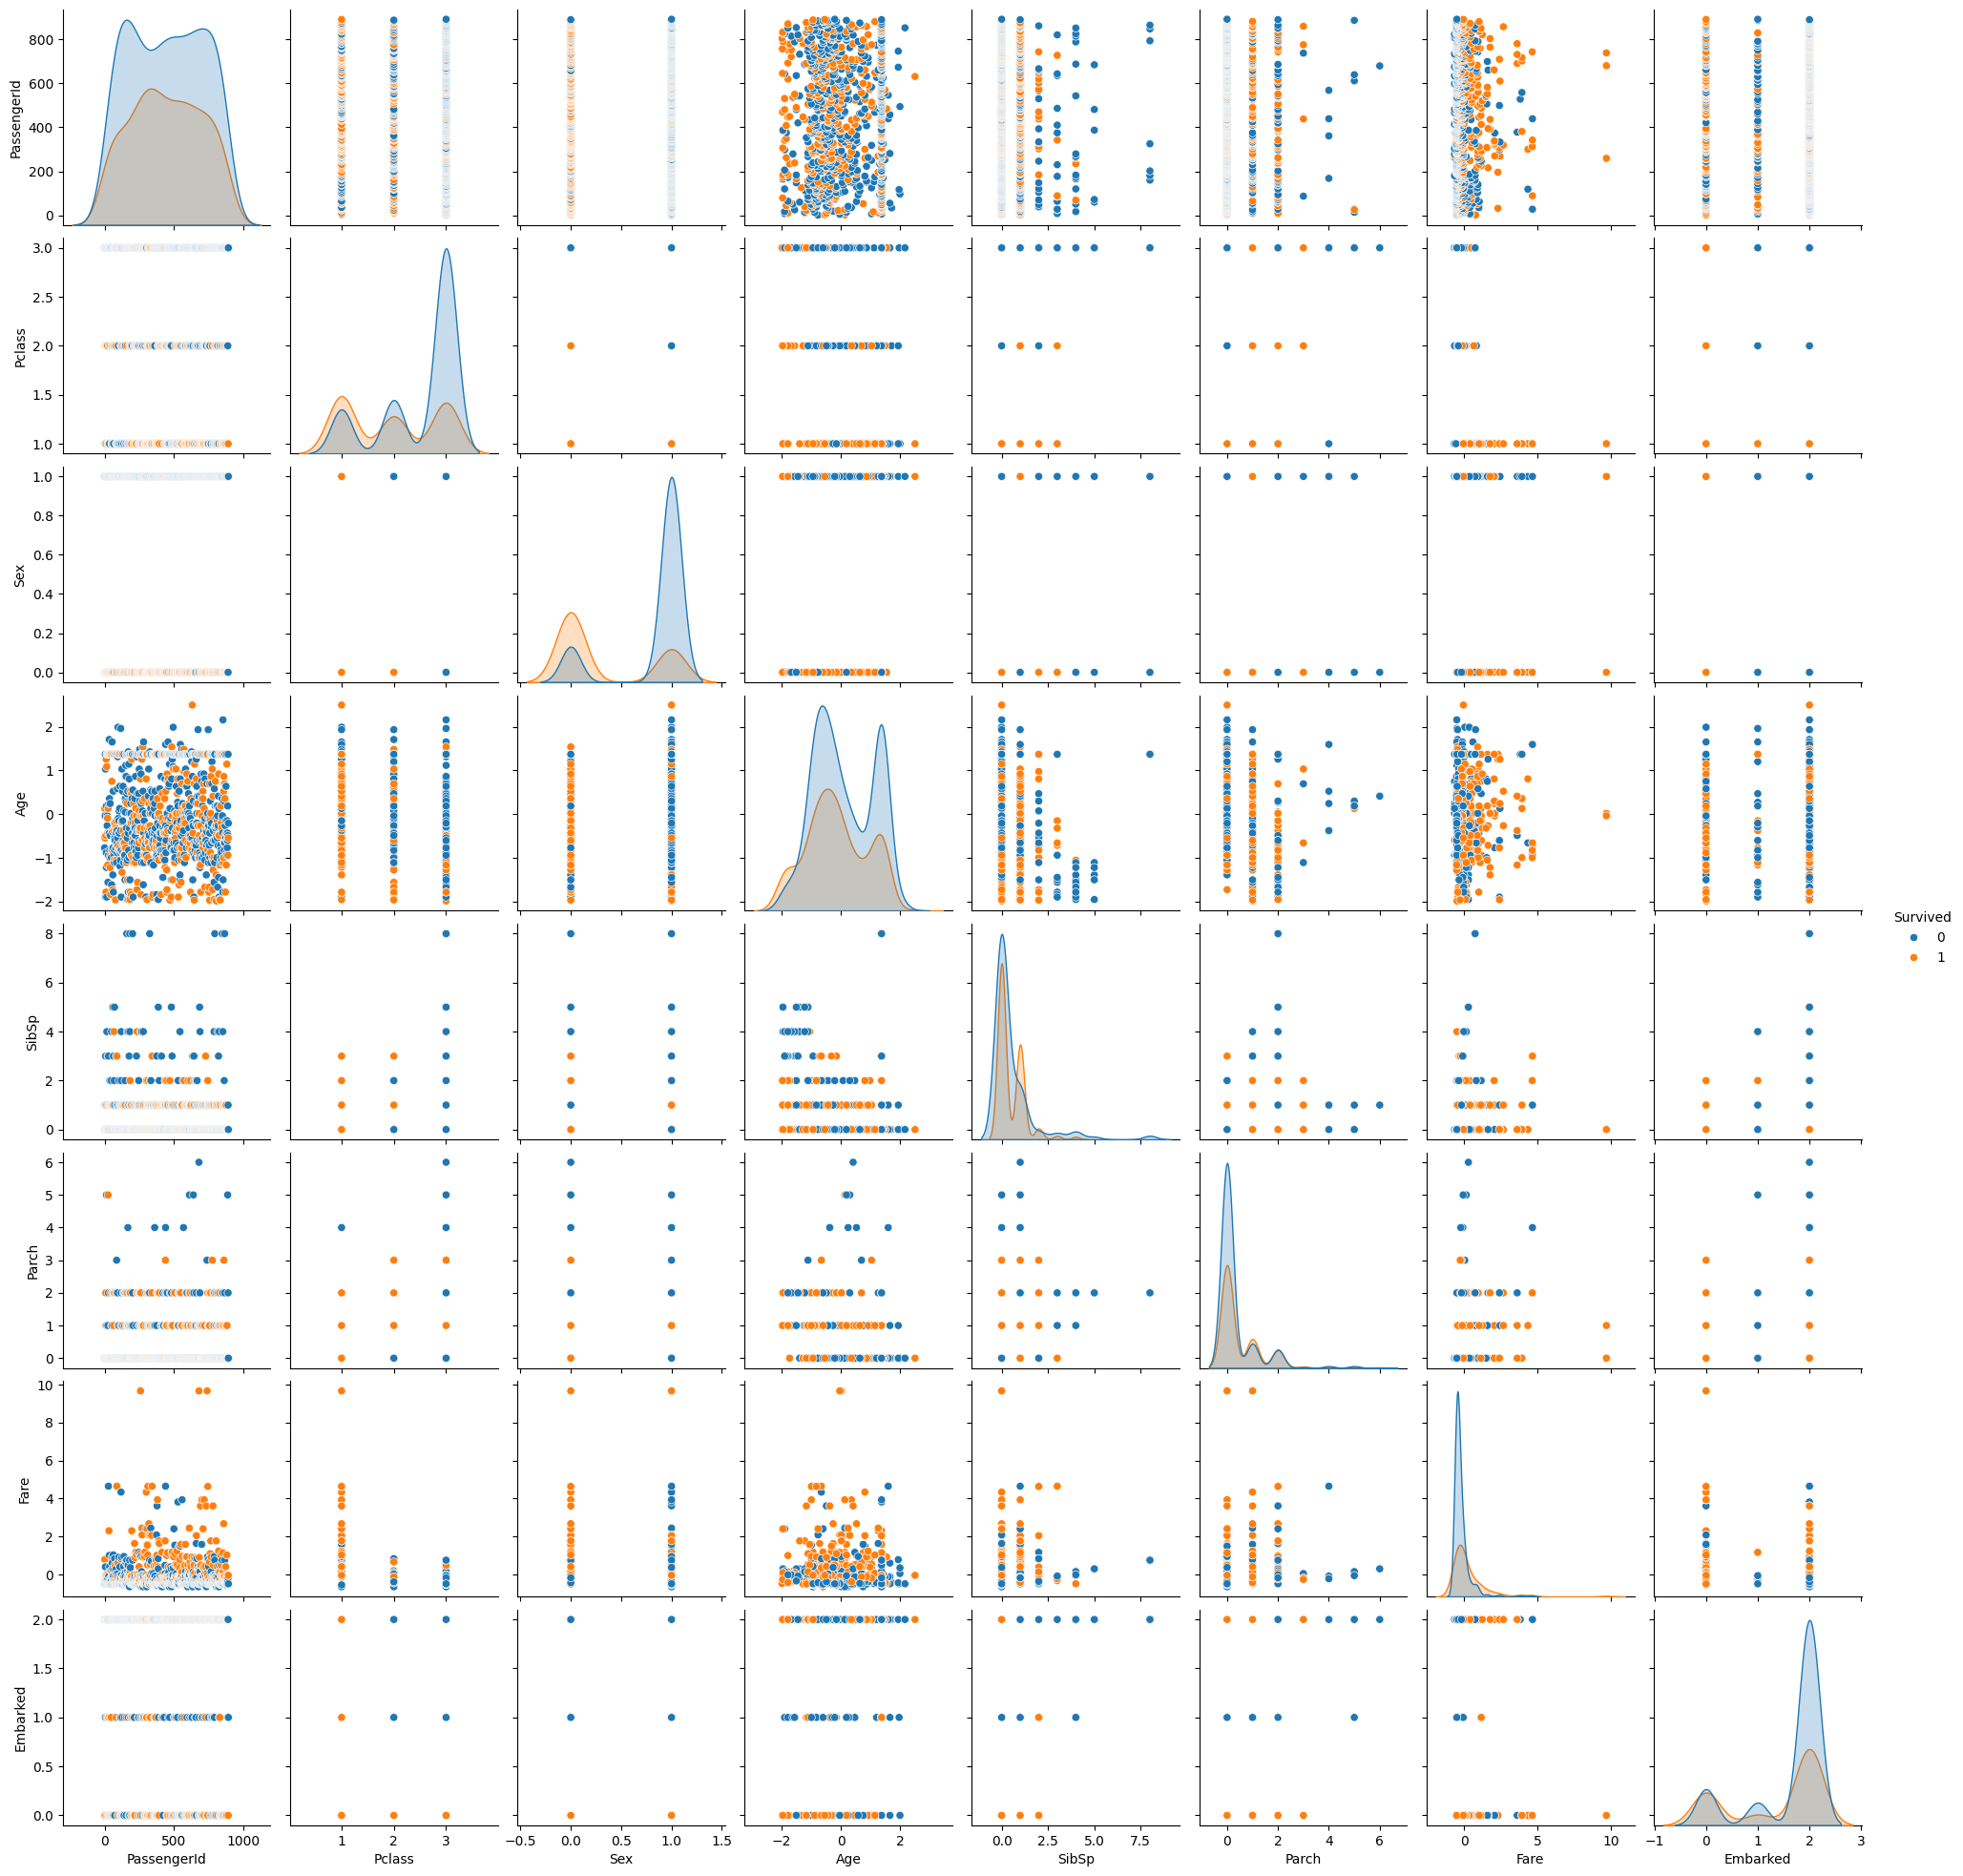

Decision Tree Model Performance:
Accuracy: 0.7247191011235955
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       109
           1       0.62      0.72      0.67        69

    accuracy                           0.72       178
   macro avg       0.72      0.72      0.72       178
weighted avg       0.74      0.72      0.73       178

--------------------------------------------------
Logistic Regression Model Performance:
Accuracy: 0.7921348314606742
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178

--------------------------------------------------
SVM Model Performance:
Accuracy: 0.8146067415730337
              precision    recall  f1-score   support

       

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load dataset (assuming CSV format)
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# Check for missing values
print(data.isnull().sum())

# Handle missing data (impute or drop rows)
data['Age'] = data['Age'].fillna(data['Age'].mean())  # Impute missing age with mean
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Impute missing Embarked with mode
data = data.dropna(subset=['Survived'])  # Drop rows where target 'Survived' is missing

# Convert categorical variables to numerical ones
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'].str.lower())  # Convert to lowercase before encoding
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Normalize or scale features
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Exploratory Data Analysis (EDA)
print(data.describe())
print(data.corr())
sns.pairplot(data, hue='Survived')
plt.show()

# Split dataset into training and testing
X = data.drop(columns=['Survived', 'PassengerId'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)